In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))


import os
import glob
import pandas as pd
import numpy as np
import ast
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns; 
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy
import pickle 
import math
from scipy.spatial import KDTree
import random




dark_pink = '#BE575F'
dark_blue = '#232C56'

# Get the current working directory
current_working_dir = os.getcwd()
current_working_dir = '//'.join(current_working_dir.split('\\')[0:-2]) + r'//data/f1//'


C:\Users\EJThompson\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
def mean_learning_curve(AA_TrainingLevels):

    TrialbyTrial_Pscores = conactinate_nth_items(AA_TrainingLevels)
    MeanLearningCurve = []
    for i,item in enumerate(TrialbyTrial_Pscores):
        MeanLearningCurve = MeanLearningCurve + [np.mean(item)]

    return MeanLearningCurve

def standard_dev_across_trials(AA_TrainingLevels):

    TrialbyTrial_tlevels = conactinate_nth_items(AA_TrainingLevels)

    standard_dev_bytrial = []
    for trial in TrialbyTrial_tlevels:
        standard_dev_bytrial = standard_dev_bytrial + [np.std(trial)]

    return standard_dev_bytrial

def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth



def CreateSequences_Time(Transition_types,Transition_times,transition_reference_time,Transition_filter_time):
    # reoder transitions into time releveant sequences  
    seq_index = 0
    TimeFiltered_ids = [[]]
    TimeFiltered_times = [[]]
    Reference_times = [[]]

    for ind, transit in enumerate (Transition_types):
        if Transition_times[ind]:
            if Transition_times[ind] < Transition_filter_time and Transition_times[ind] > 0.03: # if less than filter time and more than lower bound filter time:
                TimeFiltered_ids[seq_index] = TimeFiltered_ids[seq_index] + [transit]
                TimeFiltered_times[seq_index] = TimeFiltered_times[seq_index] + [Transition_times[ind]]
                Reference_times[seq_index] = Reference_times[seq_index] + [transition_reference_time[ind]]


            else:
                if TimeFiltered_ids[seq_index]: # if not empty 
                    seq_index = seq_index + 1
                    TimeFiltered_ids = TimeFiltered_ids + [[]]
                    TimeFiltered_times = TimeFiltered_times +[[]] 
                    Reference_times = Reference_times + [[]]
                    TimeFiltered_ids[seq_index] = TimeFiltered_ids[seq_index] + [transit]
                    TimeFiltered_times[seq_index] = TimeFiltered_times[seq_index] + [Transition_times[ind]]   
                    Reference_times[seq_index] = Reference_times[seq_index] + [transition_reference_time[ind]]
    return TimeFiltered_ids,TimeFiltered_times,Reference_times


def determime_heatmapdata(var,port1,port2,port3,port4):
    TransitionTypesIndex = np.array([11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88])
    port1_transits = []
    for i in range(((port1*8)-8),((port1*8)-8)+8):
        port1_transits = port1_transits + [var[i]]

    port2_transits = []
    for i in range(((port2*8)-8),((port2*8)-8)+8):
        port2_transits = port2_transits + [var[i]]

    port3_transits = []
    for i in range(((port3*8)-8),((port3*8)-8)+8):
        port3_transits = port3_transits + [var[i]]

    port4_transits = []
    for i in range(((port4*8)-8),((port4*8)-8)+8):
        port4_transits = port4_transits + [var[i]]

    port_transits = [port1_transits] + [port2_transits] + [port3_transits] + [port4_transits]

    return port_transits

def determineTransitionNumber(TimeFiltered_seqs):
    TransitionTypesIndex = np.array([11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88])
    trajects = []
    for inds, seqs in enumerate(TimeFiltered_seqs):
#         seqs = literal_eval(seqs) # convert back from weird df string conversion thing
        for ind, transits in enumerate(seqs):
#             if not str(transits)[0] == str(transits)[1]:
            trajects = np.append(trajects,transits)
    transition_number = []
    for transit_types in TransitionTypesIndex:
        temp = (np.where(trajects == float(transit_types)))
        transition_number.append(len(temp[0]))
    return transition_number

def reversedata(port_transits):

    reordered_port_transits = []
    for i in range(1,len(port_transits)+1):
        mylist = port_transits[-i]
        myorder = new_order
        mylist = [mylist[i] for i in myorder]
        newlist = []
        for item in mylist:
            newlist = newlist + [float(item)]
        reordered_port_transits = reordered_port_transits + [newlist]
    #restructure data to swap x and y axis:
    data = [[],[],[],[],[],[],[],[]]
    for ind in range(8):
        for index,item in enumerate(reordered_port_transits):
            data[ind] = data[ind] + [item[len(item)-1-ind]]
    for i in range(8):
        data[i].reverse()
    return data

def port_fitted_poke_times(Fitted_tfiltered_seqs,Fitted_tfiltered_times,port,max_filter):
    PortPokes = [[],[],[],[],[],[],[],[]]
    for index, seq in enumerate(Fitted_tfiltered_seqs):
        seq = literal_eval(seq) 
        if np.size(seq) > 0:
            if int(str(seq[0])[0]) == port: # if sequence starts with port
                if not int(str(seq[0])[1]) == port: #ignore self pokes 
                    current_seq_time = 0
                    for ind,item in enumerate(seq):
                        if ind > max_filter: # ignore long chains of seqs that dont return to the start port as they skew data towards being super long..
                            break
                        c_port = int(str(item)[-1])-1
                        PortPokes[c_port] = PortPokes[c_port] +[current_seq_time + literal_eval(Fitted_tfiltered_times[index])[ind]]
                        current_seq_time = current_seq_time + literal_eval(Fitted_tfiltered_times[index])[ind]
    return PortPokes

def create_plotting_df(portpokes,new_order):
    concatinated = []
    ids = []
    for index, port in enumerate(new_order):
        concatinated = concatinated + portpokes[port] 
        if index < 5:
            ids = ids +  (len(portpokes[port]) * [index])
        else:
            ids = ids +  (len(portpokes[port]) * [5])
            
    df = pd.DataFrame({'index' : ids, 
                       'Time':concatinated})
    return(df)

def convert_float_string(s):
    try:
        # Attempt to convert scientific notation to a plain float string
        if 'e' in s.lower():
            value = float(s)
            return str(value)
        else:
            return s  # Return original string if not in scientific notation
    except ValueError:
        return s  # Return original string if not a valid float

FIGURE1B

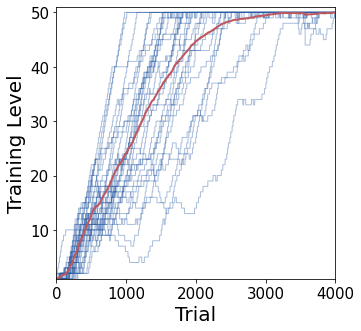

In [4]:
# load df
data = pd.read_csv(current_working_dir + 'learning_curves.csv')

# extract data from the df
training_level_by_trial = []
for row in data.training_level_by_trial.values:
    training_level_by_trial+=[literal_eval(row)]

mean_L_curve = mean_learning_curve(training_level_by_trial)
std = standard_dev_across_trials(training_level_by_trial)

window = 5
fig,ax = plt.subplots(1, 1, figsize=(5, 5))

for animal in training_level_by_trial:
    ax.plot(animal,label = str(animal), color = '#2B5DA6', alpha = 0.4,linewidth = 1)

ax.set_xlim([0, 4000])
ax.set_ylim([1, 51])
ax.plot(convolve_movmean(mean_L_curve,window), '-',color = dark_pink,linewidth = 2)

smooth_std = convolve_movmean(std,window)
upper = np.array(mean_L_curve) + np.array(smooth_std)
lower = np.array(mean_L_curve) - np.array(smooth_std)

for index,item in enumerate(upper):
    if item > 50:
        upper[index] = 50.0
        
plt.ylabel('Training Level',size = 20)
plt.xlabel('Trial',size = 20)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)


FIGURE 1C

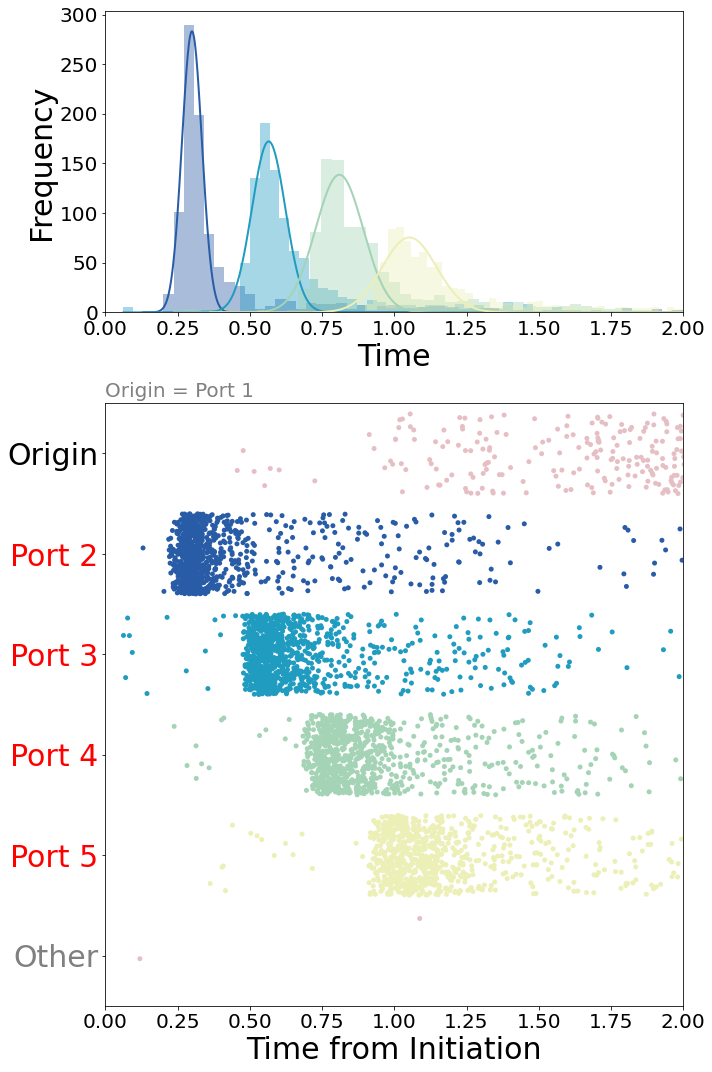

In [5]:
#data loading
example_animal_df = pd.read_csv(current_working_dir + 'example_EJT61_port1aligned.csv')
P1Fitted_tfiltered_seqs = list(example_animal_df.loc[:, 'Sequence_ids'])
P1Fitted_tfiltered_times = list(example_animal_df.loc[:, 'Sequence_times'])

#port codes
port1 = 2
port2 = 1
port3 = 6
port4 = 3
port5 = 7
a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)

Port1Pokes = port_fitted_poke_times(P1Fitted_tfiltered_seqs, P1Fitted_tfiltered_times, port1, 6)

start_port = 0
df = create_plotting_df(Port1Pokes, new_order)

colors = ['#E6BFC4', '#285CA6', '#219CC1', '#A4D3B6', '#ECEFB6', '#E6BFC4']

# Create figure and subplots
fig, (ax2, ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]},figsize=(10,15))

# Plot on ax (top subplot)
sns.stripplot(x='Time', y='index', data=df, palette=colors, edgecolor="white",
              size=5, jitter=0.4, ax=ax, orient='h')
ax.set_xlabel('Time from Initiation', fontsize=30)
ax.set_ylabel('', fontsize=30)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)
ax.set_xlim(0, 2)

# Customize y-axis tick labels and colors
all_indexes = list(df['index'].unique())
plottedports = []
for x in all_indexes:
    if x not in plottedports:
        plottedports.append(x)

lst = []
colors = []
for index, portname in enumerate(plottedports):
    if portname == start_port:
        lst.append('Origin')
        colors.append('k')
    elif portname == 5:
        lst.append('Other')
        colors.append('grey')
    else:
        lst.append('Port ' + str((portname + 1)))
        colors.append('red')

ax.set_title('Origin = Port ' + str(start_port + 1), loc='left', fontsize=20, color='grey')
ax.set_yticklabels(lst, fontsize=30)
[t.set_color(i) for (i, t) in zip(colors, ax.yaxis.get_ticklabels())]

# Plot on ax2 (top subplot)
trial_split_data = dict(tuple(df.groupby('index')))
colors = ['#E6BFC4','#285CA6','#219CC1','#A4D3B6','#ECEFB6','#E6BFC4']
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp(-(x - mean)**2 / (2 * standard_deviation ** 2))

bins_number = 100
for i, (_, data) in enumerate(trial_split_data.items()):
    if i > 0:
        x = list(data['Time'])
        bin_heights, bin_borders, _ = ax2.hist(x, bins=bins_number, label='histogram', color=colors[i], alpha=0.4)
        bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        try:
            popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
            x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
            ax2.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color=colors[i], linewidth=2)
        except Exception:
            pass

ax2.set_xlabel('Time', fontsize=30)
ax2.set_ylabel('Frequency', fontsize=30)
ax2.tick_params(axis="both", labelsize=20)
ax2.set_xlim(0, 2)

# Adjust layout and display
fig.tight_layout()
plt.show()


FIGURE1D

Text(0.5, 70.0, 'Start Port')

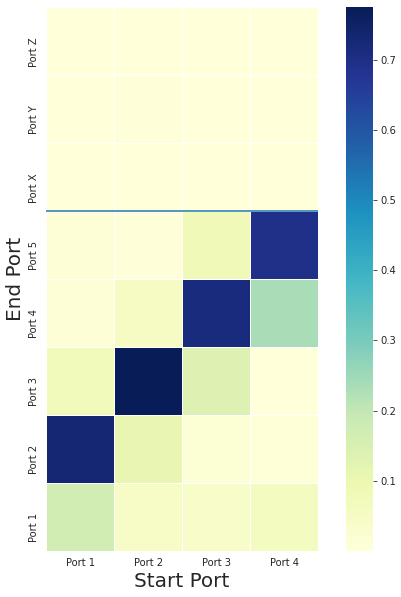

In [6]:
# load df
data = pd.read_csv(current_working_dir + 'learning_curves.csv')

# extract data from the df
trials_4000to5000_transitions = []
for row in data.trials_4000to5000_transitions.values:
    trials_4000to5000_transitions+=[literal_eval(row)]
# extract data from the df
trials_4000to5000_latency = []
for i,row in enumerate(data.trials_4000to5000_latency.values):
    row  = row.replace('nan', 'None')
    row = '[' + ', '.join(convert_float_string(x) for x in row.strip('[]').split(', ')) + ']'
    trials_4000to5000_latency+=[literal_eval(row)]

# extract data from the df
trials_4000to5000_relativestarttime= []
for row in data.trials_4000to5000_relativestarttime.values:
    row  = row.replace('nan', 'None')
    row = '[' + ', '.join(convert_float_string(x) for x in row.strip('[]').split(', ')) + ']'
    trials_4000to5000_relativestarttime+=[literal_eval(row)]

    
# define port codes
port1 = 2
port2 = 1
port3 = 6
port4 = 3
port5 = 7


AA_Port_transits = []
for i in range(len(data.animal.values)):
    TimeFiltered_ids,TimeFiltered_times,Reference_times = CreateSequences_Time(trials_4000to5000_transitions[i],trials_4000to5000_latency[i],trials_4000to5000_relativestarttime[i],Transition_filter_time = 2.0)
    Port_transits = determime_heatmapdata(determineTransitionNumber(TimeFiltered_ids),port1,port2,port3,port4)
    AA_Port_transits = AA_Port_transits + [Port_transits]


# find average transition matrix  
    
AA_data= []
for animal in AA_Port_transits:
#     flat_list = [item for sublist in animal for item in sublist]
#     normalised = list(np.array(flat_list) / sum(flat_list))
    flat_list = []
    for s_port in animal:
        normalised = list(np.array(s_port) / sum(s_port))
        flat_list = flat_list + normalised
    
    AA_data = AA_data + [flat_list]
concat_AA_data = conactinate_nth_items(AA_data)

# recreate transition matrix: 
means= [[]]*4
count = 0
index = 0
for item in concat_AA_data:
    means[index] = means[index] + [np.mean(item)]
    count = count + 1
    if count == 8:
        count = 0
        index = index + 1

a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)

mean_Port_transits = reversedata(means)    
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis

mask = np.zeros_like(mean_Port_transits)

#plot:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    h1 = sns.heatmap(mean_Port_transits,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                    linewidths=.5, mask=mask, square=True,cmap="YlGnBu",fmt = '',cbar_kws = dict(use_gridspec=False,location="right"))

#add seprrating line:
ax.hlines([3], *ax.get_ylim())
ax.set_ylabel('End Port',size = 20)
ax.set_xlabel('Start Port',size = 20)


FIGURE1G

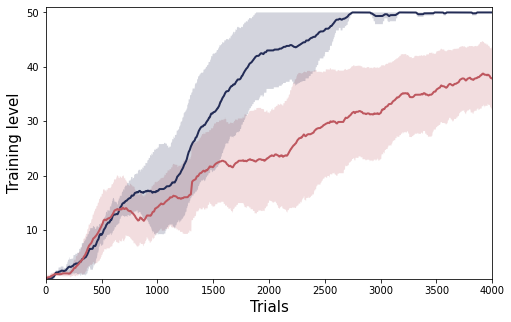

In [7]:
def parse_training_levels(training_levels):
    t_levels = []
    for row in training_levels:
        row = row.replace('nan', 'None')
        row = '[' + ', '.join(convert_float_string(x) for x in row.strip('[]').split(', ')) + ']'
        t_levels.append(literal_eval(row))
    return t_levels

def calculate_mean_std(t_levels, mask):
    trial_scores = conactinate_nth_items(np.array(t_levels)[mask])
    mean_curve = [np.mean(item) for item in trial_scores]
    std_curve = [np.std(item) for item in trial_scores]
    return mean_curve, std_curve

def fill_between_mean_std(ax, mean_curve, std_curve, color):
    upper = np.array(mean_curve[:xlim]) + np.array(std_curve[:xlim])
    lower = np.array(mean_curve[:xlim]) - np.array(std_curve[:xlim])
    upper[upper > 50] = 50  # Ceiling effect cutoff
    ax.fill_between(range(len(upper)), lower, upper, alpha=0.2, edgecolor='None', facecolor=color, linewidth=1, linestyle='dashdot', antialiased=True)


# Read CSV
pl_data = pd.read_csv(current_working_dir + 'DLS_DMS_lesion_learning_curves.csv')

# Masks
DLS_mask = pl_data.type == 'DLS'

# Extract data
categories = pl_data.catagory[DLS_mask].values
animals = pl_data.animal[DLS_mask].values
t_levels = parse_training_levels(pl_data.training_levels[DLS_mask].values)

# Calculate mean and std for lesion and control groups
lesion_mask = categories == 'lesion'
lesion_MeanLearningCurve, lesion_std = calculate_mean_std(t_levels, lesion_mask)

control_mask = categories == 'control'
control_MeanLearningCurve, control_std = calculate_mean_std(t_levels, control_mask)

# Plot
%matplotlib inline
window = 10
xlim = 4000

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_xlim([0, xlim])
ax.set_ylim([1, 51])

ax.plot(convolve_movmean(control_MeanLearningCurve[:xlim], window), '-', color=dark_blue, linewidth=2)
ax.plot(convolve_movmean(lesion_MeanLearningCurve[:xlim], window), '-', color='#BE575F', linewidth=2)

ax.set_xlabel('Trials', fontsize=15)
ax.set_ylabel('Training level', fontsize=15)

fill_between_mean_std(ax, lesion_MeanLearningCurve, lesion_std, '#BE575F')
fill_between_mean_std(ax, control_MeanLearningCurve, control_std, dark_blue)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:24<00:00, 409.51it/s]


(0.0, 4000.0)

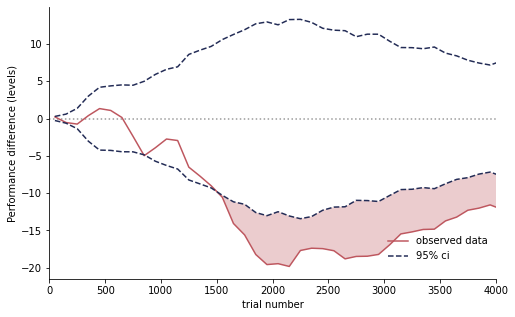

In [7]:
# Set cut-off for number of trials to consider
cut = 4000

# Initialize lists to store data
new, group, cum_trials, animalid = [], [], [], []

# Process each item in t_levels
for index, item in enumerate(t_levels):
    new += item[0:cut]  # Append the first 'cut' elements of the current item
    group += cut * ['lesion' if index < len(t_levels) / 2 else 'control']  # Assign group
    animalid += [animals[index]] * cut  # Append animal ID
    cum_trials += list(np.linspace(1, cut, cut))  # Generate cumulative trial numbers

# Create DataFrame with collected data
df = pd.DataFrame({'CumTrials': cum_trials, 'Level': new, 'Group': group, 'ID': animalid})

# Set seaborn color palette
color_palette = [(0.24715576, 0.49918708, 0.57655991), (160/255, 11/255 , 11/255)]
sns.set_palette(color_palette)


# Define function to generate experimental group labels
def generate_eg(list_size, prob, hue_order):
    return [hue_order[0] if random.random() < prob else hue_order[1] for _ in range(list_size)]



# define a 100-trial window to bin the data
XBIN = 100

# Bin trial indices
df["TrialIndexBinned"] = (df.CumTrials.values // XBIN) * XBIN + XBIN / 2

# Group by 'ID', 'Group', 'TrialIndexBinned' and calculate mean
df_bintr = df.groupby(['ID', 'Group', 'TrialIndexBinned']).mean().reset_index()
df_bintr['Performance'] = df_bintr.Level

hue_order = ['control', 'lesion']

# Calculate performance difference between groups
perdif_df = df_bintr[df_bintr.Group == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
            df_bintr[df_bintr.Group == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']

# Select necessary columns
df_colsel = df_bintr[['ID', 'Group', 'TrialIndexBinned', 'Performance']].copy()

# Calculate probability for experimental group
exp_gr = [df_colsel[df_colsel.ID == x].Group.unique()[0] for x in df_colsel.ID.unique()]
cb_prob = sum([x == hue_order[0] for x in exp_gr]) / len(exp_gr)

# Seed for reproducibility
np.random.seed(124321)

# Shuffle results
shuff_res = []

# Shuffle and compute performance differences
NSH = 10000
for _ in tqdm(range(NSH)):
    exp_grs = generate_eg(len(exp_gr), cb_prob,hue_order)
    egs_dict = dict(zip(df_colsel.ID.unique(), exp_grs))
    df_colsel['egs'] = df_colsel.ID.map(egs_dict)
    diff = df_colsel[df_colsel.egs == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
           df_colsel[df_colsel.egs == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
    shuff_res.append(diff)

shrdf = pd.concat(shuff_res)

# Calculate real data performance difference
real_data = df_colsel[df_colsel.Group == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
            df_colsel[df_colsel.Group == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
real_data *= -1

# Plot results
pos_ci = shrdf.groupby('TrialIndexBinned').quantile(.95)
neg_ci = shrdf.groupby('TrialIndexBinned').quantile(.05)

fig2 = plt.figure(figsize=(8, 5))
plt.axhline(0, ls='dotted', alpha=0.4, color='k')
plt.plot(real_data, color='#BE575F', label='observed data')
plt.plot(pos_ci, linestyle='--', color='#232C56', label='95% ci')
plt.plot(neg_ci, linestyle='--', color='#232C56')

x = pos_ci.reset_index().TrialIndexBinned
y1 = neg_ci.reset_index().Performance
y2 = real_data.reset_index().Performance

plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='#BE575F', alpha=.3, interpolate=True)
plt.ylabel('Performance difference (levels)')
plt.xlabel('trial number')
plt.legend(loc=(0.75, 0.05), frameon=False)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim((0, 4000))

figure 1H

ShapiroResult(statistic=0.9090660214424133, pvalue=0.34753385186195374)
ShapiroResult(statistic=0.8736276030540466, pvalue=0.16350632905960083)
ShapiroResult(statistic=0.9571178555488586, pvalue=0.7936607599258423)
ShapiroResult(statistic=0.6116372346878052, pvalue=0.00037254678318277)
-------------
Ttest_indResult(statistic=1.529448834573391, pvalue=0.1484300476939176)
MannwhitneyuResult(statistic=49.0, pvalue=0.0021407097315851217)


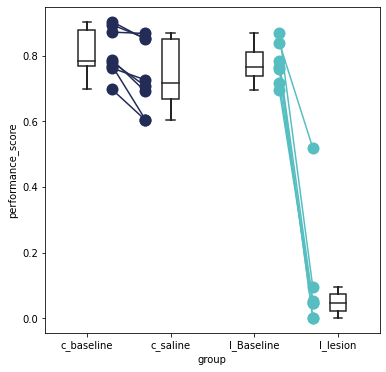

In [8]:
# Read CSV
lesion_data = pd.read_csv(current_working_dir + 'pre_post_lesion_data.csv')

lesion_mask = lesion_data.type.values == 'lesion'
l_pre_mask = lesion_data[lesion_mask].Group.values == 'Pre Lesion'
l_post_mask = lesion_data[lesion_mask].Group.values == 'Post Lesion'
control_mask = lesion_data.type.values == 'control'
c_pre_mask = lesion_data[control_mask].Group.values == 'Pre Lesion'
c_post_mask = lesion_data[control_mask].Group.values == 'Post Lesion'


controls_temp = []
for index in range(len(lesion_data[control_mask][c_pre_mask].pscores.values)):
    pre_ = literal_eval(lesion_data[control_mask][c_pre_mask].pscores.values[index])
    post_ = literal_eval(lesion_data[control_mask][c_post_mask].pscores.values[index])
    controls_temp.append((pre_ + post_)[0:6])
lesions_temp = []
for index in range(len(lesion_data[lesion_mask][l_pre_mask].pscores.values)):
    pre_ = literal_eval(lesion_data[lesion_mask][l_pre_mask].pscores.values[index])
    post_ = literal_eval(lesion_data[lesion_mask][l_post_mask].pscores.values[index])
    lesions_temp.append((pre_ + post_)[0:6])
    
    
pre_c_means = []
post_c_means = []
for item in controls_temp:
    pre_c_means = pre_c_means + [np.mean(item[0:3])]
    post_c_means = post_c_means + [np.mean(item[3::])]

pre_l_means = []
post_l_means = []
for item in lesions_temp:
    pre_l_means = pre_l_means + [np.mean(item[0:3])]
    post_l_means = post_l_means + [np.mean(item[3::])]
    
fig, ax = plt.subplots(1, 1,figsize=(6,6))

scores = pre_c_means + post_c_means + pre_l_means + post_l_means
type_ = ['c_baseline']*len(pre_c_means) + ['c_saline']*len(post_c_means) + ['l_Baseline']*len(pre_l_means) + ['l_lesion']*len(post_l_means)
plot_df = pd.DataFrame({'group': type_, 'performance_score': scores})

ax=sns.boxplot( y = 'performance_score', x = 'group', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

for i in range(len(pre_c_means)):
    plt.plot([0.3,0.7],[pre_c_means[i],post_c_means[i]],'o-',color = dark_blue, alpha = 1, markersize = 12,markeredgewidth=0)
for i in range(len(pre_l_means)):
    plt.plot([2.3,2.7],[pre_l_means[i],post_l_means[i]],'o-',color = '#56BEC1', alpha = 1, markersize = 12,markeredgewidth=0)

for item in [pre_c_means, post_c_means, pre_l_means,post_l_means]:
    print(scipy.stats.shapiro(item))
print('-------------')
print(scipy.stats.ttest_ind(pre_c_means,post_c_means))
print(scipy.stats.mannwhitneyu(pre_l_means,post_l_means))

figure i

In [9]:
with open(glob.glob(current_working_dir + '*\data\lesion_tracking_df.pkl')[0], 'rb') as f:
    lesion_tracking_df = pickle.load(f)
lesion_tracking_df['group'] = ['lesion_group']*len(lesion_tracking_df)

with open(glob.glob(current_working_dir + '*\data\lesion_port_positions.pkl')[0], 'rb') as f:
    lesion_port_positions = pickle.load(f)

with open(glob.glob(current_working_dir + '*\data\learning_tracking_df.pkl')[0], 'rb') as f:
    learning_tracking_df = pickle.load(f)
learning_tracking_df['group'] = ['lesion_group']*len(learning_tracking_df)

with open(glob.glob(current_working_dir + '*\data\learning_port_positions.pkl')[0], 'rb') as f:
    learning_port_positions = pickle.load(f)
    

IndexError: list index out of range

In [ ]:
def closest_points(target, points, threshold):
    import math
    closest = []
    indicies = []
    for index,point in enumerate(points):
        distance = math.dist(target,point)
        if distance <= threshold:
            closest.append(point)
            indicies.append(index)
    return closest,indicies

def extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,exclude_port_1,exclude_port_2,exclude_port_3):

    start_ind = []
    end_ind = []


    index = 0
    while index < len(threshold_breaks[:-1]):
        break_ = threshold_breaks[index]
        if break_ == start_port and not threshold_breaks[index+1] ==start_port:
            # find min valin this that is larger than current - ie. next index
            p3_ind = find_next_val(index,threshold_breaks,frame_filter,end_port)
            # ignore any really bad ones that enter othe rports first, the -1 takes care of the excluded trajectories (gets rid of weird noise hwere the DLC tracking jumps outsid eof the task zone)
            if not exclude_port_1 in threshold_breaks[index:p3_ind] and not exclude_port_2 in threshold_breaks[index:p3_ind] and not exclude_port_3 in threshold_breaks[index:p3_ind] and not -1 in threshold_breaks[index:p3_ind]:
                if p3_ind != -1:
                    start_ind += [index-3]
                    end_ind += [p3_ind+3]
                    if not index == (p3_ind - 1):
                        index = p3_ind - 1
                    else:
                        index = p3_ind
                else:
                    index+=1
            else:
                index += 1
        else:
            index +=1

    return start_ind, end_ind

def find_next_val(index,threshold_breaks,frame_filter,port_type):
    p2_indicies = np.where(threshold_breaks == port_type)[0]
    try:
        p2_min_val = min(i for i in p2_indicies if i > index)
        distance = p2_min_val - index
    except:
        distance = 9999999
    if distance<frame_filter:
        return p2_min_val
    else:
        return -1
    
def create_xy_segments(T1_start_ind,T1_end_ind):
    segment1 = []
    for i in range(len(T1_start_ind)):  
        x_vals = current_x[T1_start_ind[i]:T1_end_ind[i]]
        y_vals = current_y[T1_start_ind[i]:T1_end_ind[i]]
        xy_coords = []
        for index,x in enumerate(x_vals):
            xy_coords += [(x,y_vals[index])]
        segment1 += [xy_coords]
    return(segment1)

from scipy.interpolate import interp1d

def interpolate_to_longest_and_find_average_curve(curves):
    
    # Find the length of the longest curve
    max_length = max([len(curve) for curve in curves])

    # Interpolate each curve to the length of the longest curve
    interpolated_curves = []
    for curve in curves:
        if len(curve) > 0:
            x = [point[0] for point in curve]
            y = [point[1] for point in curve]

            # find lots of points on the piecewise linear curve defined by x and y
            M = max_length
            t = np.linspace(0, len(x), M)
            x_interp = np.interp(t, np.arange(len(x)), x)
            y_interp = np.interp(t, np.arange(len(y)), y)

            interpolated_curves.append([[x, y] for x, y in zip(x_interp, y_interp)])

    # # Average the x and y coordinates of all the interpolated curves
    average_curve = []
    for i in range(max_length):
        x_sum = 0
        y_sum = 0
        for curve in interpolated_curves:
            x_sum += curve[i][0]
            y_sum += curve[i][1]
        average_curve.append([x_sum / len(interpolated_curves), y_sum / len(interpolated_curves)])

    return average_curve

def total_length_of_curve(curve):
    x = [point[0] for point in curve]
    y = [point[1] for point in curve]
    dists = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    return np.sum(dists)

def closest_point(line1, line2):
    tree = KDTree(line2)
    dist, index = tree.query(line1)
    return index, dist

## find closest point to average curve for each segment vector
def calculate_var_from_average(segment_,interpolated_av_curve_):
    median_dists1=[]
    std_dists1 = []
    for i in range(len(segment_)):
        index,dist = closest_point(segment_[i],interpolated_av_curve_)
        median_dists1 += [np.median(dist)]
        std_dists1 += [np.std(dist)]
    return median_dists1,std_dists1


def plot_mean_like_curves(std_dists4,segment4,COLOR,ax):

    plotable_indexes = []
    mean_std = np.mean(std_dists4)
    for index,item in enumerate(std_dists4):
        if item < mean_std + (mean_std* 0.5):
            if item > mean_std - (mean_std* 0.5):
                plotable_indexes += [index]
 
    try:
        random.seed(1) # so that its constant for this script
        plotable_indexes = random.sample(plotable_indexes, 15)
    except:
        plotable_indexes = [0,1,2,3,4]

    for index in plotable_indexes:
        curve = segment4[index]
        x = [point[0] for point in curve]
        y = [point[1] for point in curve]
        ax.plot(x, y, '-',color = COLOR)
        
    return plotable_indexes

def define_port_positions(lesion_port_positions,animal):
    port_positions = []
    for i in range(5):
        port = lesion_port_positions[animal][i]
        if animal == 2 and i == 1:
            # hacky fix because port 1 was messed up for this tracking
            port_positions += [[np.median(lesion_port_positions[animal][3].interped_x.values),np.median(lesion_port_positions[animal][0].interped_y.values)]]
        else:
            port_positions += [[np.median(port.interped_x),np.median(port.interped_y)]]
    port_centroids = port_positions
    return port_centroids

def port_threshold_breaks(coords,port_centroids,current_x,current_y):
    radius = 45
    threshold_breaks = np.zeros(len(coords))
    # for each port we care about find where the mouse breaks the distcance threshold
    for ind_ in range(0,len(port_centroids)):
        threshold = radius
        target = port_centroids[ind_]
        closest,indicies = closest_points(target, coords, threshold)

        threshold_breaks[indicies] = ind_ + 1

    # exclude (by labelling with -1) any times the trajetcory goes outside of the port area
    half_dist = (port_centroids[0][-1] - port_centroids[4][-1])/2
    exclusion_mask = (np.array(current_y) < (port_centroids[0][-1] + half_dist)) * (np.array(current_y) > (port_centroids[4][-1] - half_dist))
    exclusion_inds = np.where(exclusion_mask == False)
    threshold_breaks[exclusion_inds] = -1

    # exclude (by labelling with -1) any times the trajetcory goes outside of the port area
    half_dist = (port_centroids[1][0] - port_centroids[0][0])/2
    exclusion_mask = (np.array(current_x) > (port_centroids[0][0] - half_dist)) * (np.array(current_x) < (port_centroids[4][0] + half_dist))
    exclusion_inds = np.where(exclusion_mask == False)
    threshold_breaks[exclusion_inds] = -1
    
    return threshold_breaks

def interpolate_av_curves(a_curve1,a_curve2,a_curve3,a_curve4):
    interpolated_av_curves = []
    for a_curve_ in [a_curve1,a_curve2,a_curve3,a_curve4]:

        total_length = total_length_of_curve(a_curve_)
        # chose number of points you want to construct the curve out of - this will only be roughly fitted as the code does a lot of rounding. This cant be smaller than the current length - ifyou do this is will just keep the curve the same (it can only add points)
        num_points = 2000
        # number to multiply the segment length to get the rough breakdown so that we get around 1000 in total 
        segment_warp_factor = num_points/int(total_length) 
        interpolated_av_curve = []
        for i in tqdm(range(len(a_curve_))):
            if i>0:
                st_ = a_curve_[i]
                ed_ = a_curve_[i-1]
                seg_distance = math.dist(st_,ed_)
                num_points_to_add = np.round(seg_distance * segment_warp_factor)
                if num_points_to_add >1:

                    seg = [st_] + [ed_]
                    x = [point[0] for point in seg]
                    y = [point[1] for point in seg]

                    M = int(num_points_to_add)
                    t = np.linspace(0, len(x), M)
                    x_interp = np.interp(t, np.arange(len(x)), x)
                    y_interp = np.interp(t, np.arange(len(y)), y)

                    interpolated_av_curve += ([[x, y] for x, y in zip(x_interp, y_interp)])
                else:
                    interpolated_av_curve += [a_curve_[i]]  
        interpolated_av_curves += [interpolated_av_curve]
    return interpolated_av_curves

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 13726.57it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 12567.70it/s]
C:\Users\Emmett\AppData\Local\Temp\ipykernel_13304\1871190380.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1,figsize=(8, 4))
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

no 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124/124 [00:00<00:00, 10249.57it/s]


no 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 10207.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 222.00it/s]


no 46
no 47
no 48
no 49


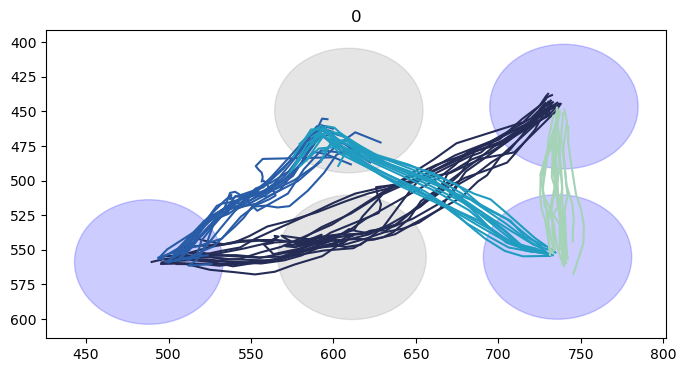

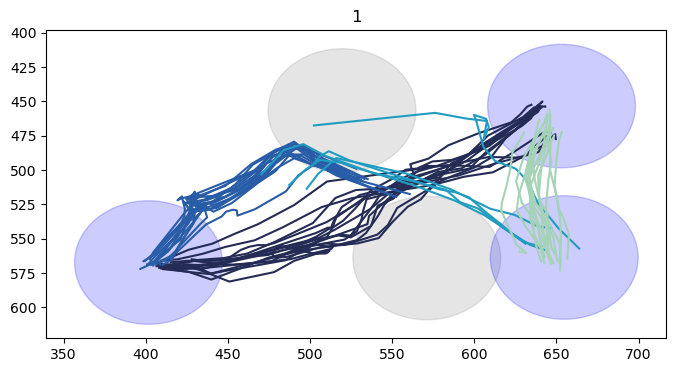

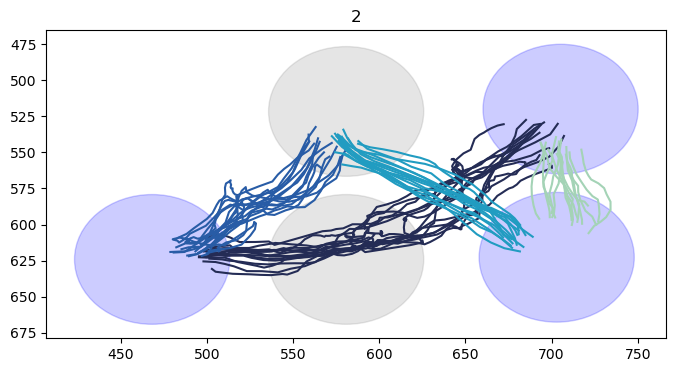

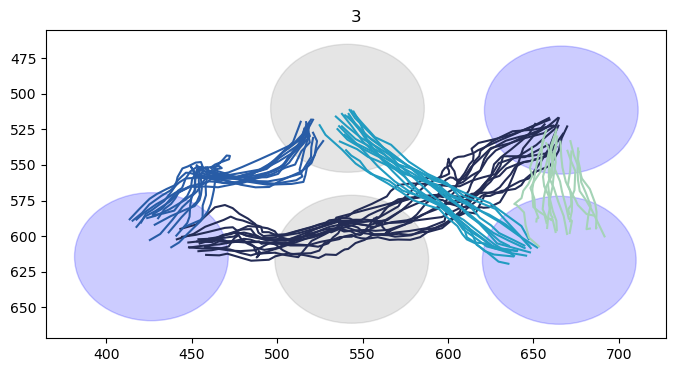

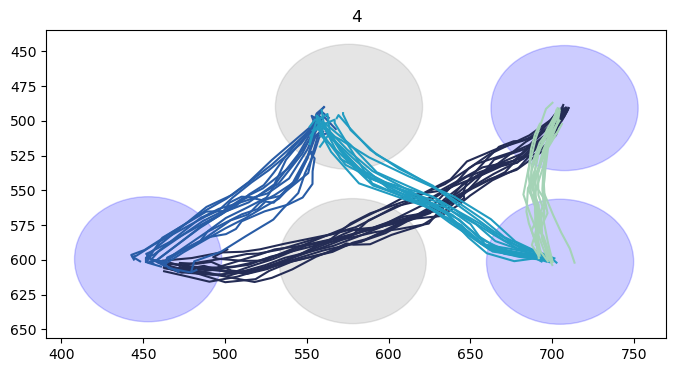

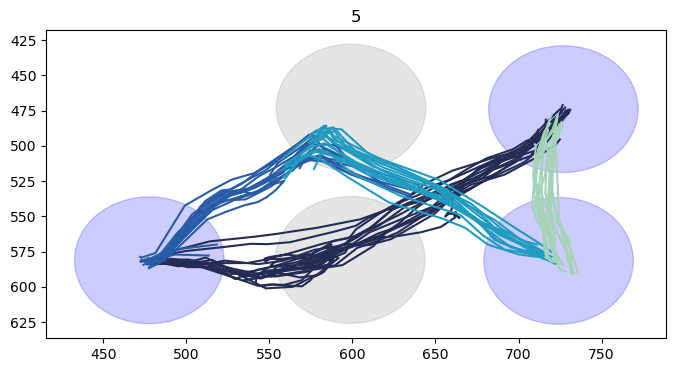

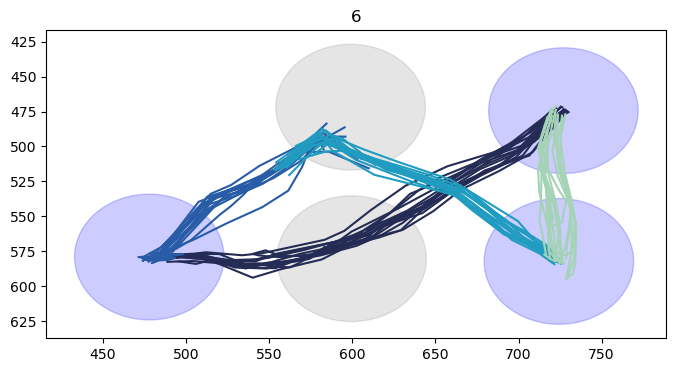

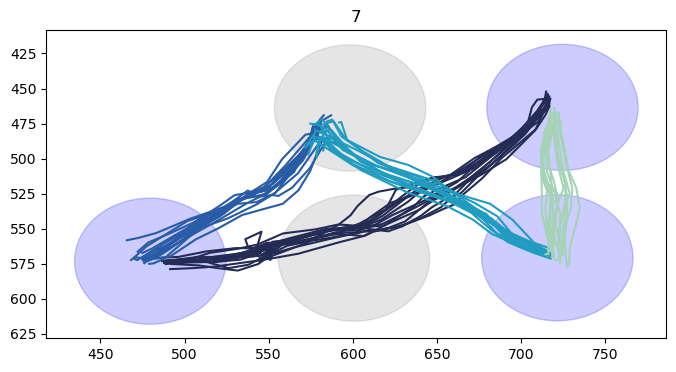

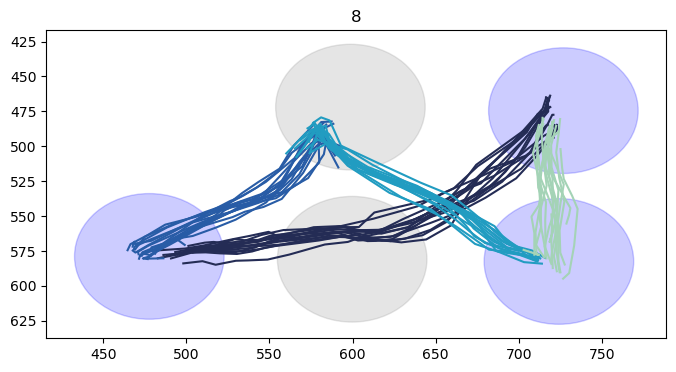

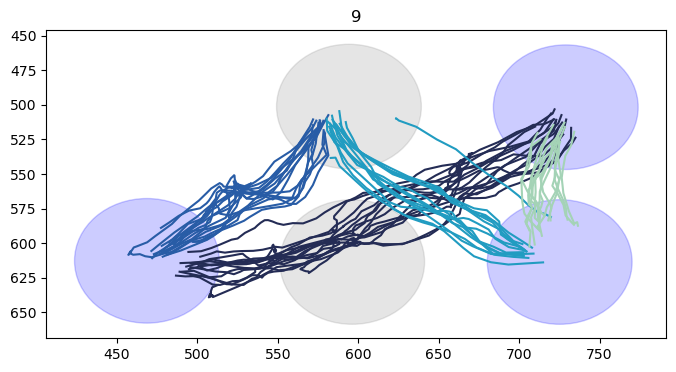

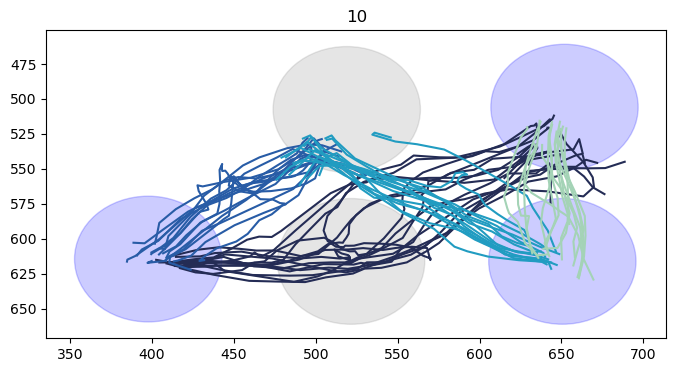

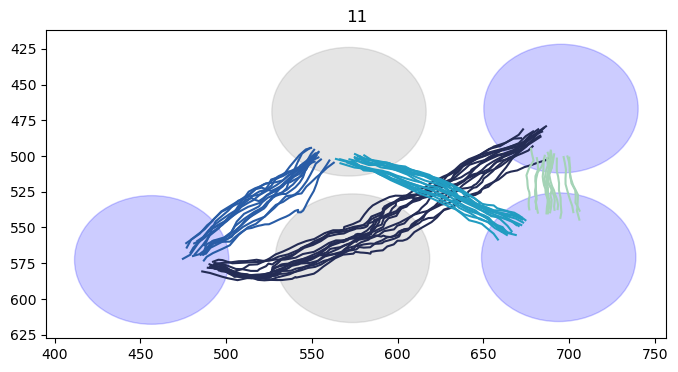

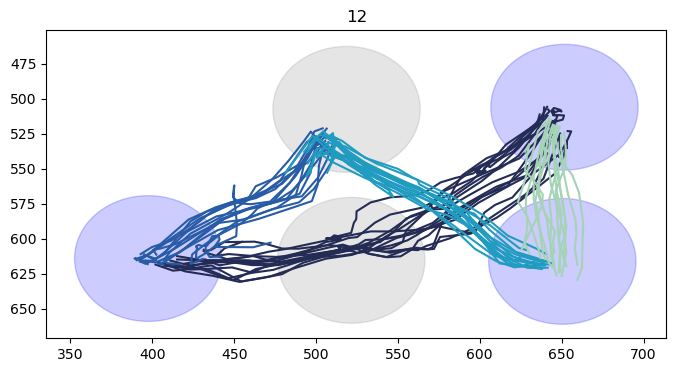

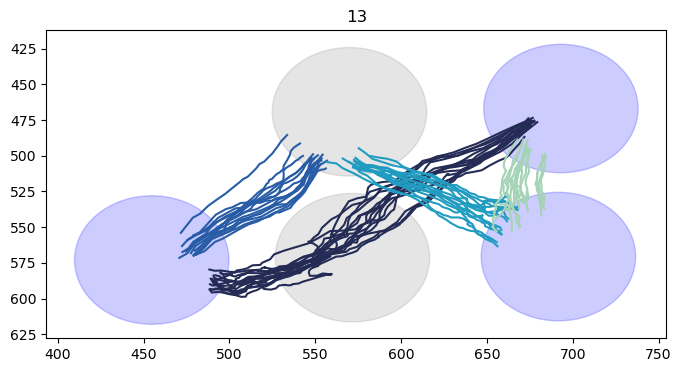

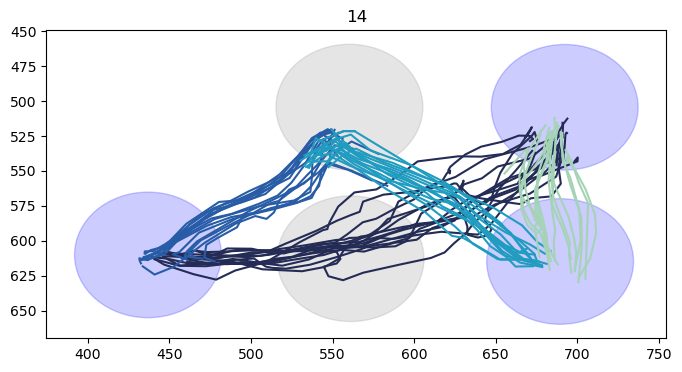

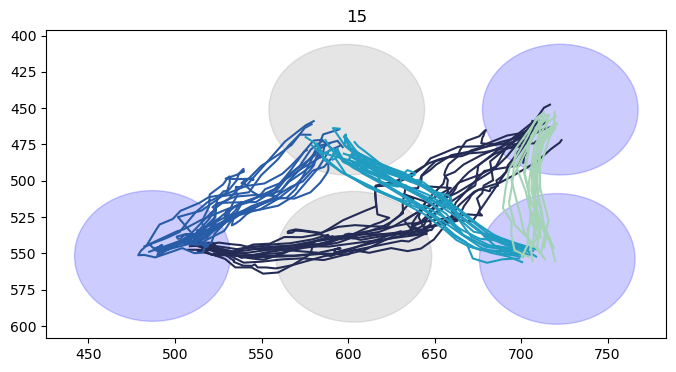

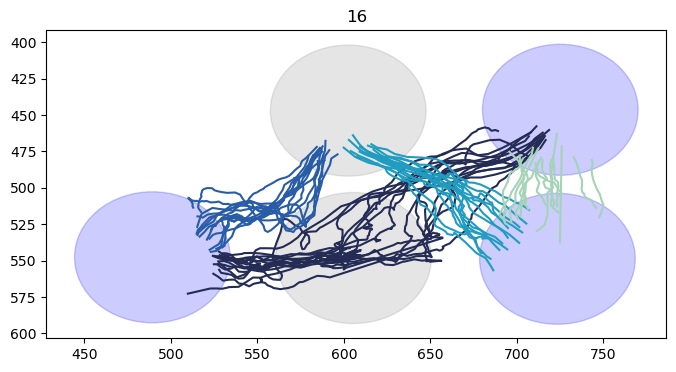

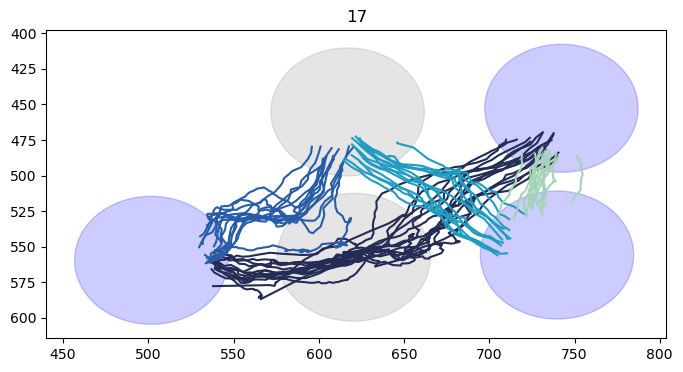

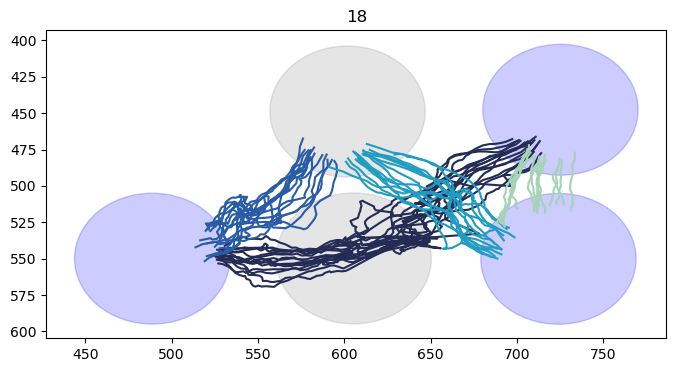

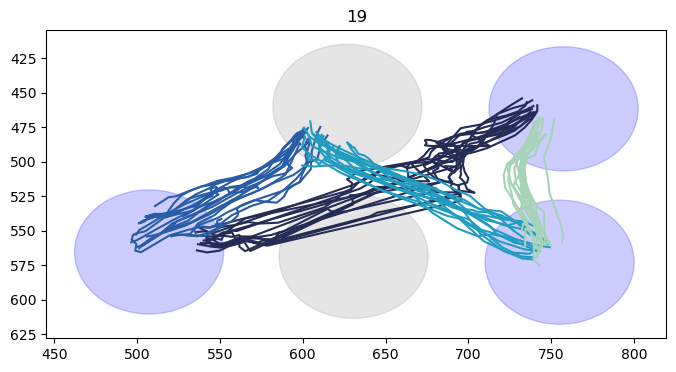

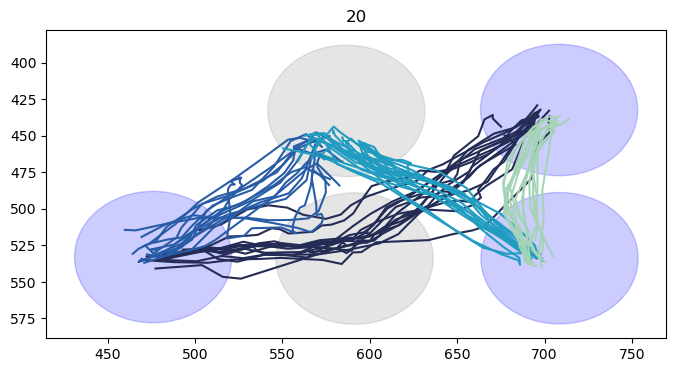

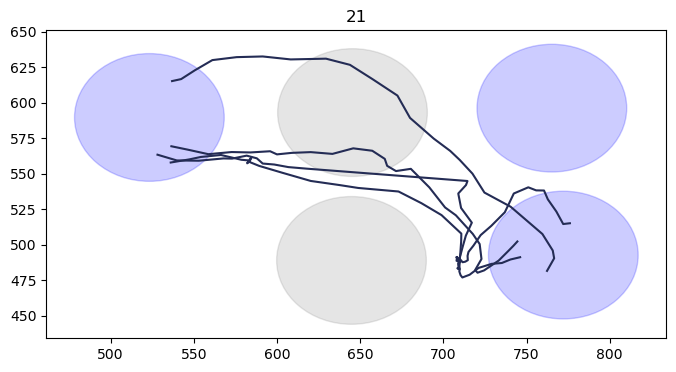

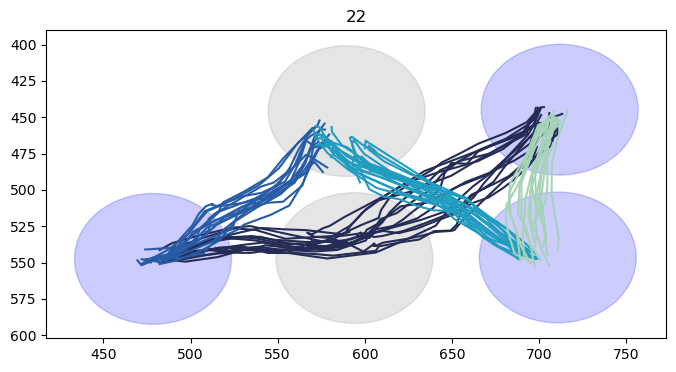

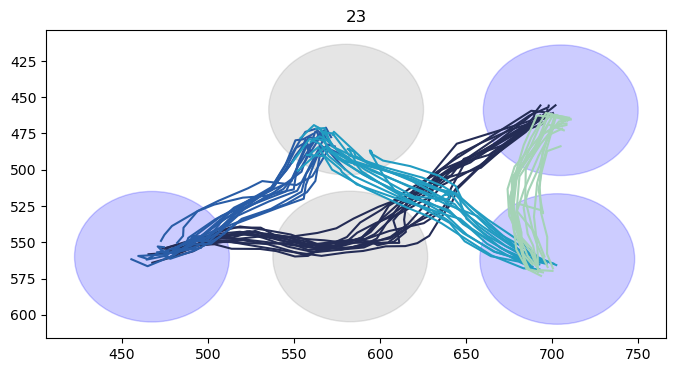

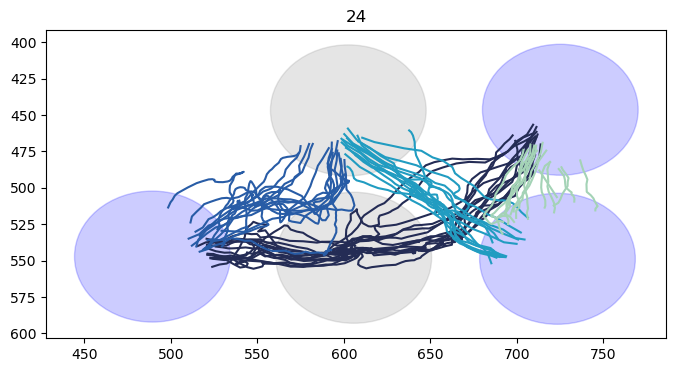

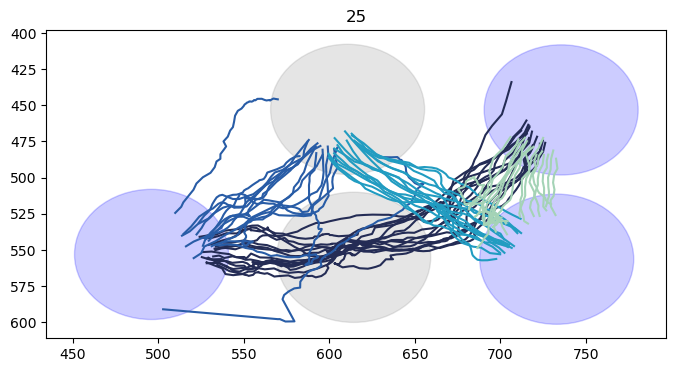

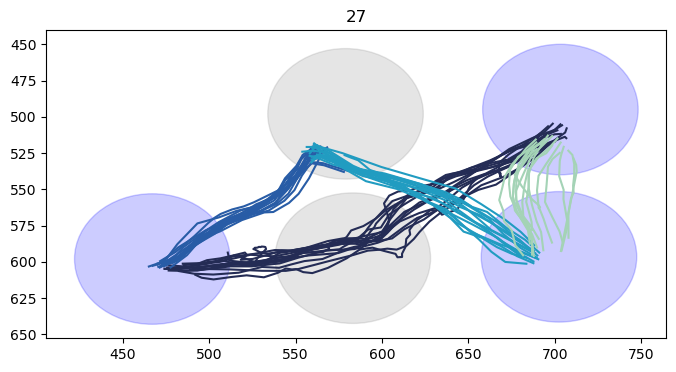

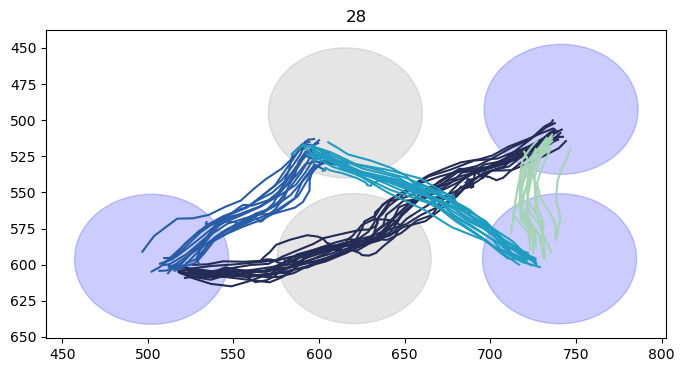

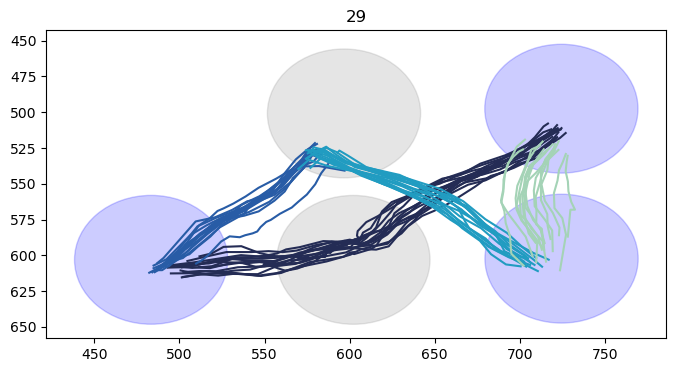

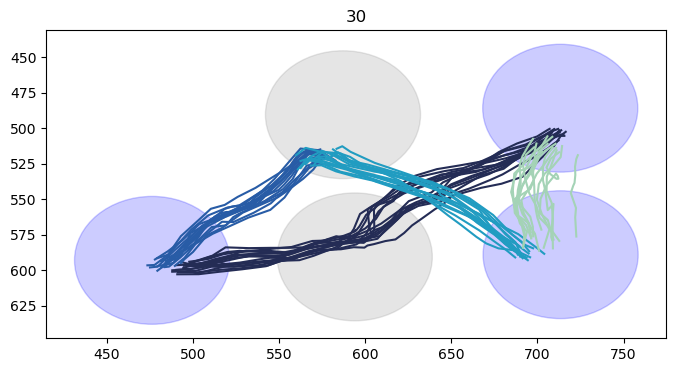

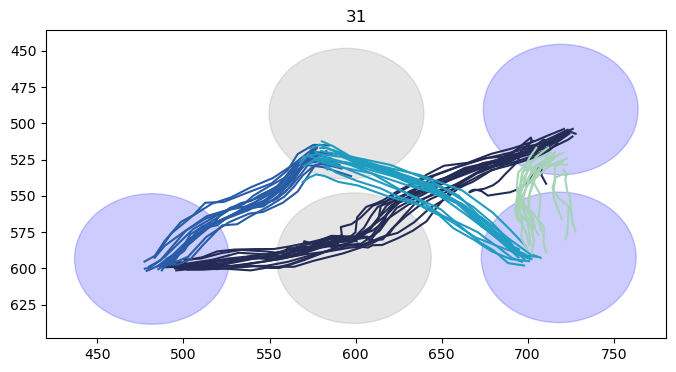

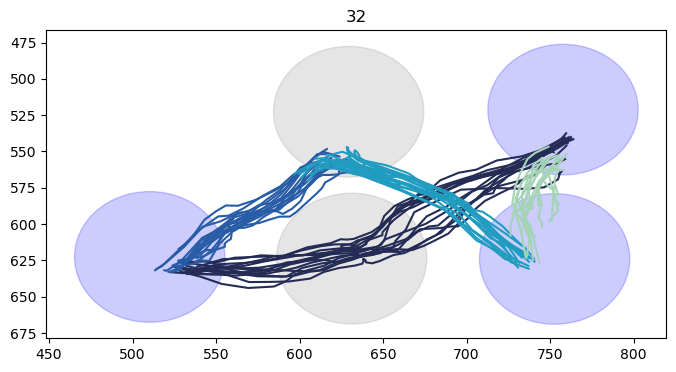

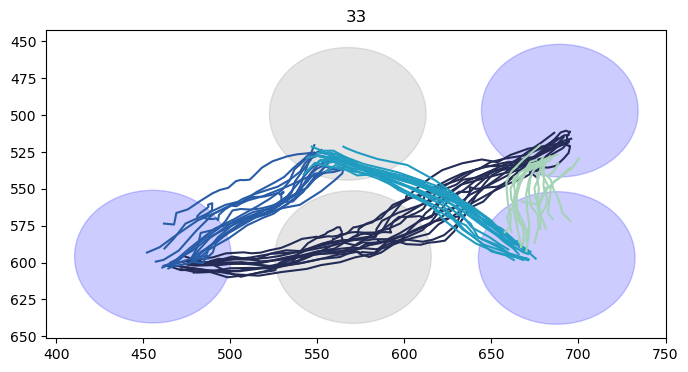

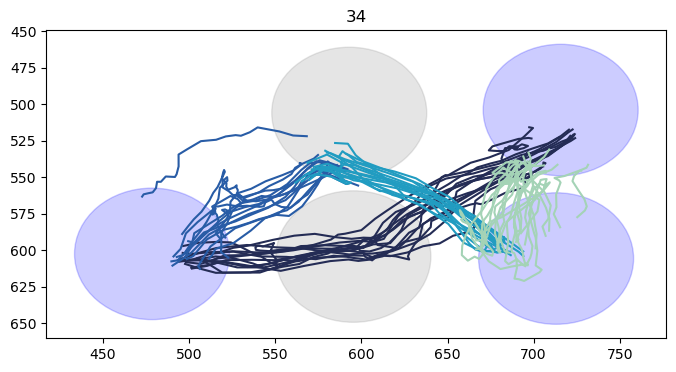

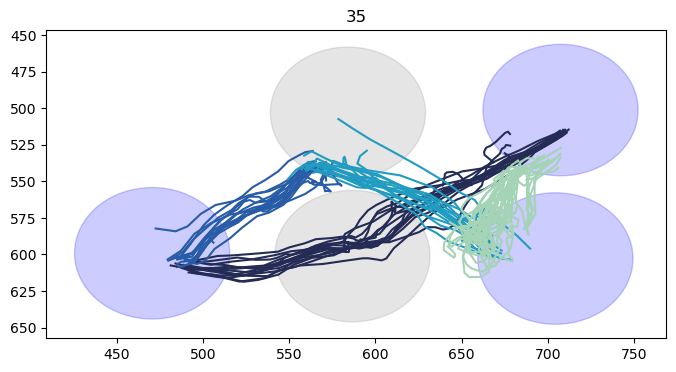

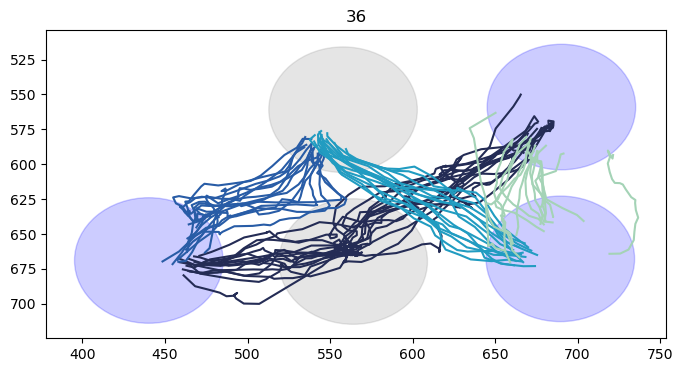

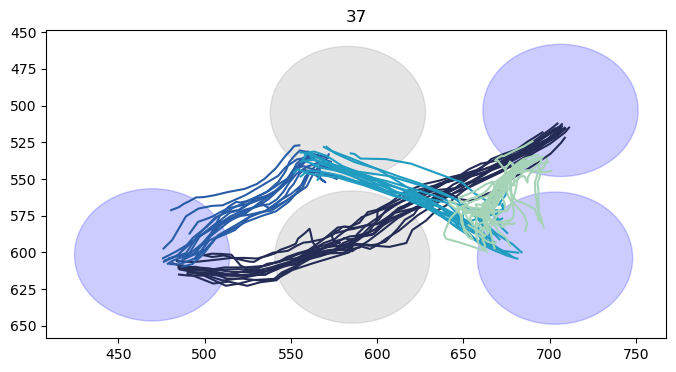

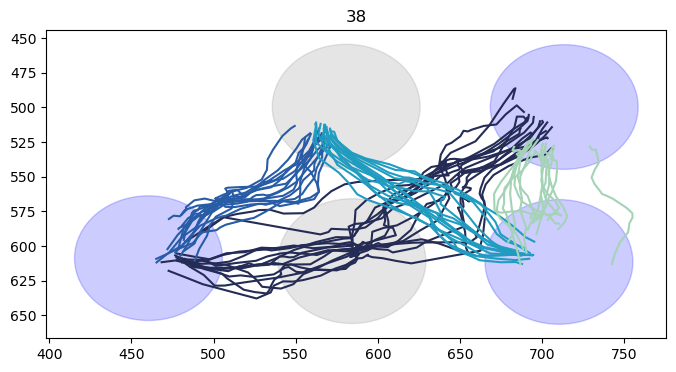

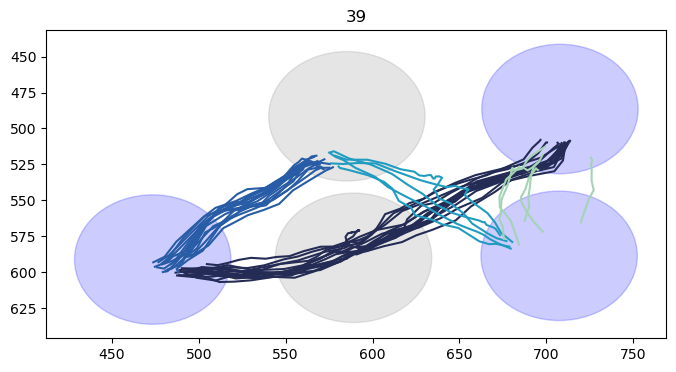

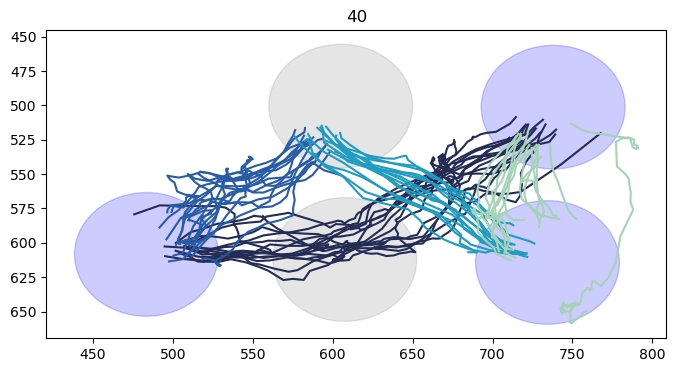

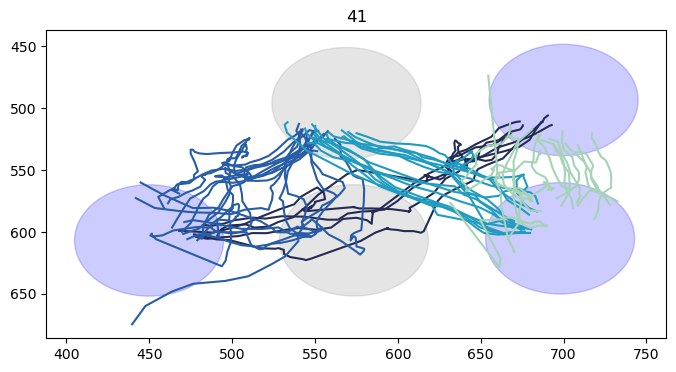

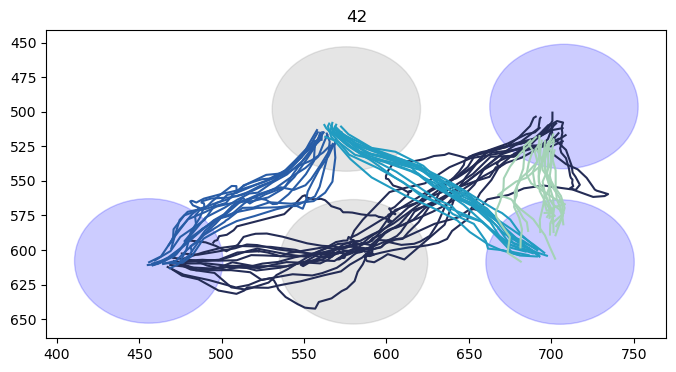

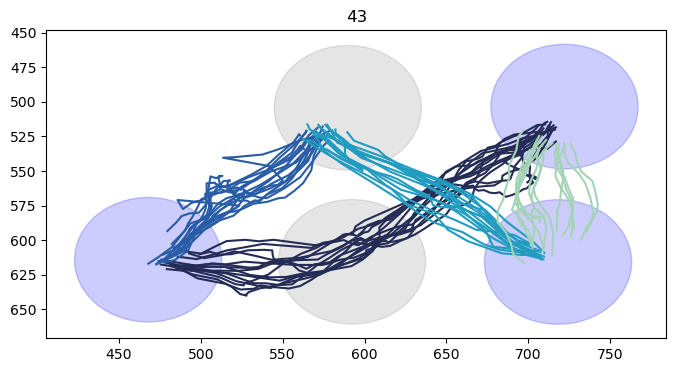

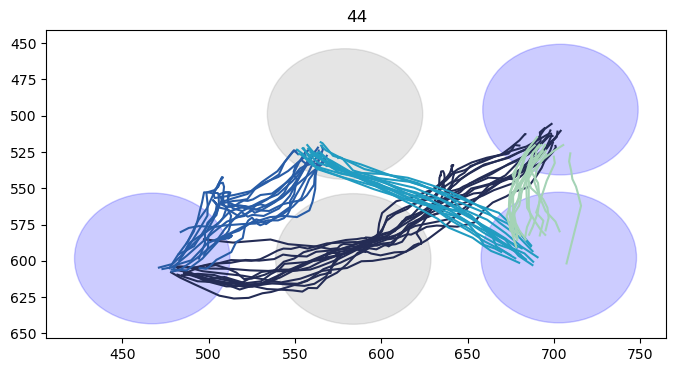

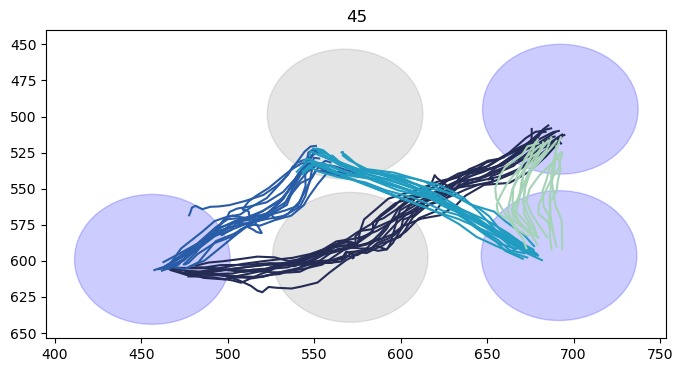

In [13]:
for animal in range(50):
    
    try:

        current_x = learning_tracking_df.back_tracking[animal].interped_x.values
        current_y = learning_tracking_df.back_tracking[animal].interped_y.values

        # extract x y coords
        coords = []
        for ind_,item in enumerate(current_x):
            coords += [[item,current_y[ind_]]]

        # define port locations
        port_centroids= define_port_positions(learning_port_positions,animal)

        #find times that the mouse went near eahc port
        threshold_breaks= port_threshold_breaks(coords,port_centroids,current_x,current_y)

        ## set a port to port time filter - each x,y is a camera frame so we know the timing between them. ie. one frame is 1/60s (60hz frame rate)
        time_filter = 2 #in s
        frame_filter = int(time_filter / (1/60)) # convert to frame time

        # for each of the 4 port to port transition vectors, find times the mouse made this movement. 
        start_port,end_port = 5,1
        T1_start_ind, T1_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,3,4,-1)
        start_port,end_port = 1,4
        T2_start_ind, T2_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,-1,3,5)
        start_port,end_port = 4,3
        T3_start_ind, T3_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,2,5)
        start_port,end_port = 3,5
        T4_start_ind, T4_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,-1,4)

        # define these segments in xy coords
        segment1 = create_xy_segments(T1_start_ind,T1_end_ind)
        segment2 = create_xy_segments(T2_start_ind,T2_end_ind)
        segment3 = create_xy_segments(T3_start_ind,T3_end_ind)
        segment4 = create_xy_segments(T4_start_ind,T4_end_ind)

        # add points so that they are all the same 'lenght' in term sof points and find the average curve 
        a_curve1 = interpolate_to_longest_and_find_average_curve(segment1)
        a_curve2 = interpolate_to_longest_and_find_average_curve(segment2)
        a_curve3 = interpolate_to_longest_and_find_average_curve(segment3)
        a_curve4 = interpolate_to_longest_and_find_average_curve(segment4)

        # interpolate these average cruves to fill with a whole bunch of points, the more the better - higher spatial acuity 
        interpolated_av_curves = interpolate_av_curves(a_curve1,a_curve2,a_curve3,a_curve4)

        # take these interpolated av curves and find how far each point in the tracked xy segment is from the average to get overal var from mean curve 
        median_dists1,std_dists1 = calculate_var_from_average(segment1,interpolated_av_curves[0])
        median_dists2,std_dists2 = calculate_var_from_average(segment2,interpolated_av_curves[1])
        median_dists3,std_dists3 = calculate_var_from_average(segment3,interpolated_av_curves[2])
        median_dists4,std_dists4 = calculate_var_from_average(segment4,interpolated_av_curves[3])


        fig, ax = plt.subplots(1, 1,figsize=(8, 4))
        ax.set_title(str(animal))
        for index,port_centroid in enumerate(port_centroids):
            ## define rings around important ports: port 5, port2, port 3, port
            radius = 45
            c = ['blue','grey','blue','grey','blue']
            circle1 = plt.Circle(port_centroid, radius, color=c[index], alpha = 0.2)
            ax.add_patch(circle1)
        ## randomly plot a selection of transition vector segments that are representaitve of the mean (within 0.5 standard deviations)
        plotable_indexes1 = plot_mean_like_curves(std_dists1,segment1,'#242C55',ax)
        plotable_indexes2 = plot_mean_like_curves(std_dists2,segment2,'#285CA6',ax)
        plotable_indexes3 = plot_mean_like_curves(std_dists3,segment3,'#219CC1',ax)
        plotable_indexes4 = plot_mean_like_curves(std_dists4,segment4,'#A4D3B6',ax)
        ax.invert_yaxis()
        
        fig.savefig(r'D:\temp_test\\' + str(animal) + '.png')

    except:
        print('no ' + str(animal))
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4495.12it/s]


no 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 9371.25it/s]


no 6
no 7
no 8
no 9
no 10
no 11
no 12
no 13
no 14


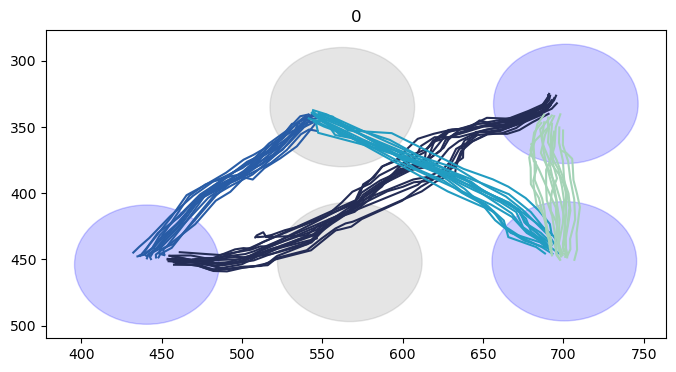

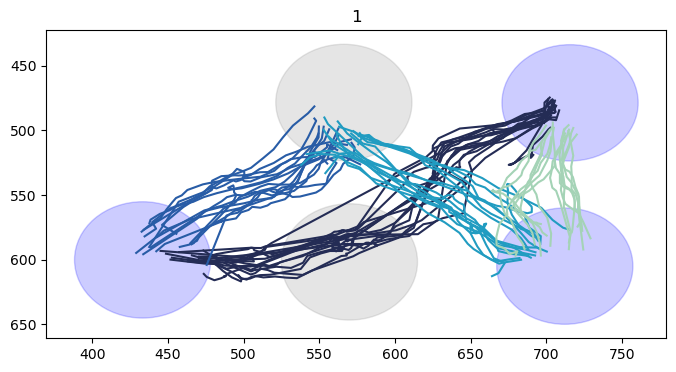

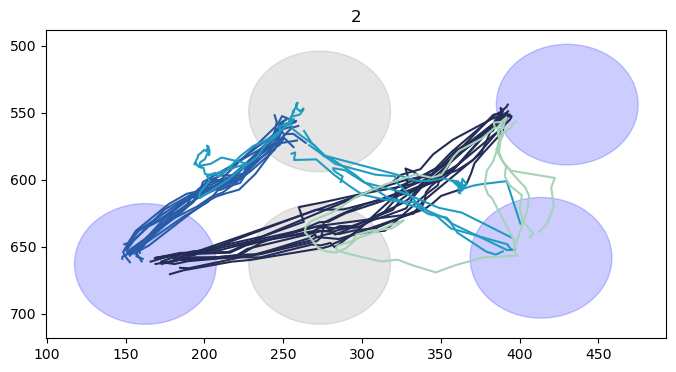

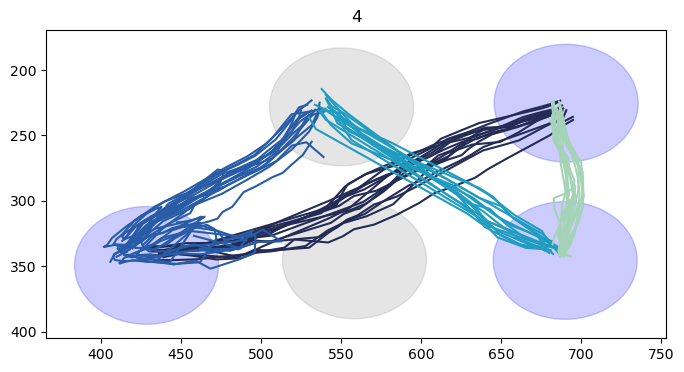

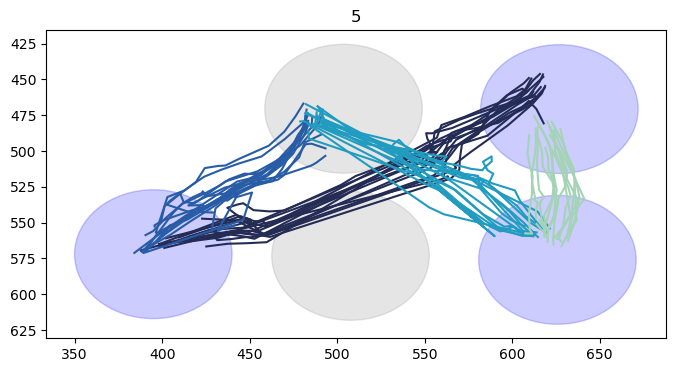

In [14]:
for animal in range(15):
    
    try:

        current_x = lesion_tracking_df.back_tracking[animal].interped_x.values
        current_y = lesion_tracking_df.back_tracking[animal].interped_y.values

        # extract x y coords
        coords = []
        for ind_,item in enumerate(current_x):
            coords += [[item,current_y[ind_]]]

        # define port locations
        port_centroids= define_port_positions(lesion_port_positions,animal)

        #find times that the mouse went near eahc port
        threshold_breaks= port_threshold_breaks(coords,port_centroids,current_x,current_y)

        ## set a port to port time filter - each x,y is a camera frame so we know the timing between them. ie. one frame is 1/60s (60hz frame rate)
        time_filter = 2 #in s
        frame_filter = int(time_filter / (1/60)) # convert to frame time

        # for each of the 4 port to port transition vectors, find times the mouse made this movement. 
        start_port,end_port = 5,1
        T1_start_ind, T1_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,3,4,-1)
        start_port,end_port = 1,4
        T2_start_ind, T2_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,-1,3,5)
        start_port,end_port = 4,3
        T3_start_ind, T3_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,2,5)
        start_port,end_port = 3,5
        T4_start_ind, T4_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,-1,4)

        # define these segments in xy coords
        segment1 = create_xy_segments(T1_start_ind,T1_end_ind)
        segment2 = create_xy_segments(T2_start_ind,T2_end_ind)
        segment3 = create_xy_segments(T3_start_ind,T3_end_ind)
        segment4 = create_xy_segments(T4_start_ind,T4_end_ind)

        # add points so that they are all the same 'lenght' in term sof points and find the average curve 
        a_curve1 = interpolate_to_longest_and_find_average_curve(segment1)
        a_curve2 = interpolate_to_longest_and_find_average_curve(segment2)
        a_curve3 = interpolate_to_longest_and_find_average_curve(segment3)
        a_curve4 = interpolate_to_longest_and_find_average_curve(segment4)

        # interpolate these average cruves to fill with a whole bunch of points, the more the better - higher spatial acuity 
        interpolated_av_curves = interpolate_av_curves(a_curve1,a_curve2,a_curve3,a_curve4)

        # take these interpolated av curves and find how far each point in the tracked xy segment is from the average to get overal var from mean curve 
        median_dists1,std_dists1 = calculate_var_from_average(segment1,interpolated_av_curves[0])
        median_dists2,std_dists2 = calculate_var_from_average(segment2,interpolated_av_curves[1])
        median_dists3,std_dists3 = calculate_var_from_average(segment3,interpolated_av_curves[2])
        median_dists4,std_dists4 = calculate_var_from_average(segment4,interpolated_av_curves[3])


        fig, ax = plt.subplots(1, 1,figsize=(8, 4))
        ax.set_title(str(animal))
        for index,port_centroid in enumerate(port_centroids):
            ## define rings around important ports: port 5, port2, port 3, port
            radius = 45
            c = ['blue','grey','blue','grey','blue']
            circle1 = plt.Circle(port_centroid, radius, color=c[index], alpha = 0.2)
            ax.add_patch(circle1)
        ## randomly plot a selection of transition vector segments that are representaitve of the mean (within 0.5 standard deviations)
        plotable_indexes1 = plot_mean_like_curves(std_dists1,segment1,'#242C55',ax)
        plotable_indexes2 = plot_mean_like_curves(std_dists2,segment2,'#285CA6',ax)
        plotable_indexes3 = plot_mean_like_curves(std_dists3,segment3,'#219CC1',ax)
        plotable_indexes4 = plot_mean_like_curves(std_dists4,segment4,'#A4D3B6',ax)
        ax.invert_yaxis()
        
        fig.savefig(r'D:\temp_test\\' + str(animal) + '.png')

    except:
        print('no ' + str(animal))
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 6751.39it/s]


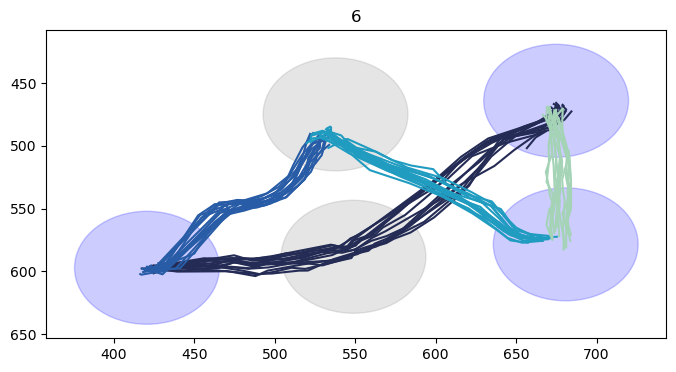

In [730]:
animal = 6

current_x = lesion_tracking_df.back_tracking[animal].interped_x.values
current_y = lesion_tracking_df.back_tracking[animal].interped_y.values

# extract x y coords
coords = []
for ind_,item in enumerate(current_x):
    coords += [[item,current_y[ind_]]]
    
# define port locations
port_centroids= define_port_positions(lesion_port_positions,animal)

#find times that the mouse went near eahc port
threshold_breaks= port_threshold_breaks(coords,port_centroids,current_x,current_y)

## set a port to port time filter - each x,y is a camera frame so we know the timing between them. ie. one frame is 1/60s (60hz frame rate)
time_filter = 2 #in s
frame_filter = int(time_filter / (1/60)) # convert to frame time

# for each of the 4 port to port transition vectors, find times the mouse made this movement. 
start_port,end_port = 5,1
T1_start_ind, T1_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,3,4,-1)
start_port,end_port = 1,4
T2_start_ind, T2_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,-1,3,5)
start_port,end_port = 4,3
T3_start_ind, T3_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,2,5)
start_port,end_port = 3,5
T4_start_ind, T4_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,-1,4)

# define these segments in xy coords
segment1 = create_xy_segments(T1_start_ind,T1_end_ind)
segment2 = create_xy_segments(T2_start_ind,T2_end_ind)
segment3 = create_xy_segments(T3_start_ind,T3_end_ind)
segment4 = create_xy_segments(T4_start_ind,T4_end_ind)

# add points so that they are all the same 'lenght' in term sof points and find the average curve 
a_curve1 = interpolate_to_longest_and_find_average_curve(segment1)
a_curve2 = interpolate_to_longest_and_find_average_curve(segment2)
a_curve3 = interpolate_to_longest_and_find_average_curve(segment3)
a_curve4 = interpolate_to_longest_and_find_average_curve(segment4)

# interpolate these average cruves to fill with a whole bunch of points, the more the better - higher spatial acuity 
interpolated_av_curves = interpolate_av_curves(a_curve1,a_curve2,a_curve3,a_curve4)

# take these interpolated av curves and find how far each point in the tracked xy segment is from the average to get overal var from mean curve 
median_dists1,std_dists1 = calculate_var_from_average(segment1,interpolated_av_curves[0])
median_dists2,std_dists2 = calculate_var_from_average(segment2,interpolated_av_curves[1])
median_dists3,std_dists3 = calculate_var_from_average(segment3,interpolated_av_curves[2])
median_dists4,std_dists4 = calculate_var_from_average(segment4,interpolated_av_curves[3])


fig, ax = plt.subplots(1, 1,figsize=(8, 4))
ax.set_title(str(animal))
for index,port_centroid in enumerate(port_centroids):
    ## define rings around important ports: port 5, port2, port 3, port
    radius = 45
    c = ['blue','grey','blue','grey','blue']
    circle1 = plt.Circle(port_centroid, radius, color=c[index], alpha = 0.2)
    ax.add_patch(circle1)
    
## randomly ( a seed value has been arbitrarily set so that it wont change for this) plot a selection of transition vector segments that are representaitve of the mean (within 0.2 standard deviations)
plotable_indexes1 = plot_mean_like_curves(std_dists1,segment1,'#242C55',ax)
plotable_indexes2 = plot_mean_like_curves(std_dists2,segment2,'#285CA6',ax)
plotable_indexes3 = plot_mean_like_curves(std_dists3,segment3,'#219CC1',ax)
plotable_indexes4 = plot_mean_like_curves(std_dists4,segment4,'#A4D3B6',ax)
ax.invert_yaxis()

    

In [732]:
lesion_tracking_df

animal   label                                     tracking_files  \
0  EJT155  before  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
1  EJT155   after  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
2  EJT156  before  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
3  EJT156   after  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
4  EJT159  before  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
5  EJT159   after  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
6  EJT161  before  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
7  EJT161   after  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
8   EJT85  before  Z:\projects\Emmett\tracking_analysis\lesion_tr...   
9   EJT85   after  Z:\projects\Emmett\tracking_analysis\lesion_tr...   

                                       back_tracking         group  
0  coords           x           y  likelihood  in...  lesion_group  
1  coords           x           y  likelihood  in...  lesion_group  
2  coords           x           y  likelihood  in...  lesion_group  
3  coords           x           y  likelihood  in...  lesion_group  
4  coords           x           y  likelihood  in...  lesion_group  
5  coords            x           y  likelihood  i...  lesion_group  
6  coords           x        y  likelihood  inter...  lesion_group  
7  coords           x           y  likelihood  in...  lesion_group  
8  coords           x           y  likelihood  in...  lesion_group  
9  coords           x           y  likelihood  in...  lesion_group

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 5926.85it/s]


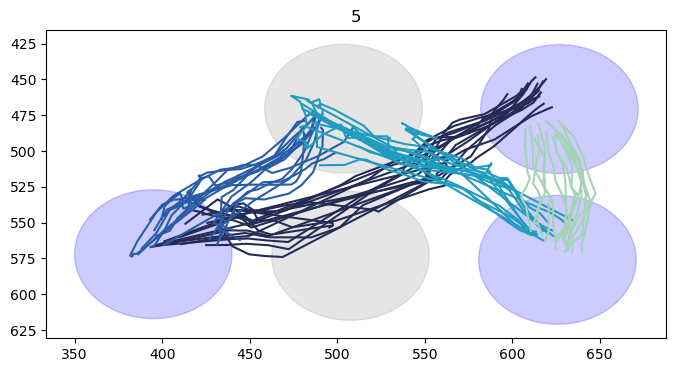

In [731]:
animal = 5

current_x = lesion_tracking_df.back_tracking[animal].interped_x.values
current_y = lesion_tracking_df.back_tracking[animal].interped_y.values

# extract x y coords
coords = []
for ind_,item in enumerate(current_x):
    coords += [[item,current_y[ind_]]]
    
# define port locations
port_centroids= define_port_positions(lesion_port_positions,animal)

#find times that the mouse went near eahc port
threshold_breaks= port_threshold_breaks(coords,port_centroids,current_x,current_y)

## set a port to port time filter - each x,y is a camera frame so we know the timing between them. ie. one frame is 1/60s (60hz frame rate)
time_filter = 2 #in s
frame_filter = int(time_filter / (1/60)) # convert to frame time

# for each of the 4 port to port transition vectors, find times the mouse made this movement. 
start_port,end_port = 5,1
T1_start_ind, T1_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,3,4,-1)
start_port,end_port = 1,4
T2_start_ind, T2_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,-1,3,5)
start_port,end_port = 4,3
T3_start_ind, T3_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,2,5)
start_port,end_port = 3,5
T4_start_ind, T4_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,-1,4)

# define these segments in xy coords
segment1 = create_xy_segments(T1_start_ind,T1_end_ind)
segment2 = create_xy_segments(T2_start_ind,T2_end_ind)
segment3 = create_xy_segments(T3_start_ind,T3_end_ind)
segment4 = create_xy_segments(T4_start_ind,T4_end_ind)

# add points so that they are all the same 'lenght' in term sof points and find the average curve 
a_curve1 = interpolate_to_longest_and_find_average_curve(segment1)
a_curve2 = interpolate_to_longest_and_find_average_curve(segment2)
a_curve3 = interpolate_to_longest_and_find_average_curve(segment3)
a_curve4 = interpolate_to_longest_and_find_average_curve(segment4)

# interpolate these average cruves to fill with a whole bunch of points, the more the better - higher spatial acuity 
interpolated_av_curves = interpolate_av_curves(a_curve1,a_curve2,a_curve3,a_curve4)

# take these interpolated av curves and find how far each point in the tracked xy segment is from the average to get overal var from mean curve 
median_dists1,std_dists1 = calculate_var_from_average(segment1,interpolated_av_curves[0])
median_dists2,std_dists2 = calculate_var_from_average(segment2,interpolated_av_curves[1])
median_dists3,std_dists3 = calculate_var_from_average(segment3,interpolated_av_curves[2])
median_dists4,std_dists4 = calculate_var_from_average(segment4,interpolated_av_curves[3])


fig, ax = plt.subplots(1, 1,figsize=(8, 4))
ax.set_title(str(animal))
for index,port_centroid in enumerate(port_centroids):
    ## define rings around important ports: port 5, port2, port 3, port
    radius = 45
    c = ['blue','grey','blue','grey','blue']
    circle1 = plt.Circle(port_centroid, radius, color=c[index], alpha = 0.2)
    ax.add_patch(circle1)
## randomly plot a selection of transition vector segments that are representaitve of the mean (within 0.2 standard deviations)
plotable_indexes1 = plot_mean_like_curves(std_dists1,segment1,'#242C55',ax)
plotable_indexes2 = plot_mean_like_curves(std_dists2,segment2,'#285CA6',ax)
plotable_indexes3 = plot_mean_like_curves(std_dists3,segment3,'#219CC1',ax)
plotable_indexes4 = plot_mean_like_curves(std_dists4,segment4,'#A4D3B6',ax)
ax.invert_yaxis()

    

C:\Users\Emmett\AppData\Local\Temp\ipykernel_30824\2950628982.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, group in enumerate(mean_tracking_var_df.groupby(['PrePost'])):
C:\Users\Emmett\AppData\Local\Temp\ipykernel_30824\2950628982.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, group in enumerate(mean_tracking_var_df.groupby(['PrePost'])):


ShapiroResult(statistic=0.9320836663246155, pvalue=0.43231508135795593)
ShapiroResult(statistic=0.8185084462165833, pvalue=0.11370760202407837)
ShapiroResult(statistic=0.9549217820167542, pvalue=0.7722542881965637)
F_onewayResult(statistic=16.80534492440014, pvalue=7.63476316270566e-05)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------------
ealry_learning   post   1.3807 0.3249 -1.0051  3.7665  False
ealry_learning    pre  -4.5468 0.0004 -6.9326  -2.161   True
          post    pre  -5.9275 0.0001 -8.7251 -3.1299   True
------------------------------------------------------------


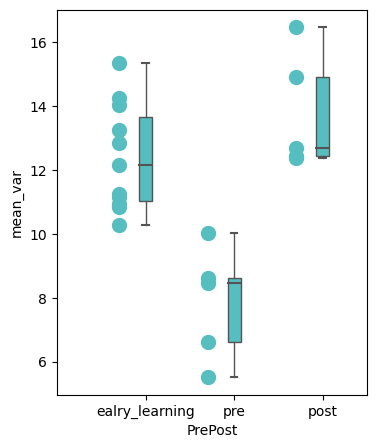

In [417]:
mean_tracking_var_df = pd.read_csv(glob.glob(current_working_dir + '*\data\extracted_tracking_standard_deviations.csv')[0])

fig,ax= plt.subplots(1, 1,figsize=(4, 5))

loc = [-0.3,1.7,0.7]
for i, group in enumerate(mean_tracking_var_df.groupby(['PrePost'])):
    dat = group[1].mean_var.values
    ax.plot([loc[i]]*len(dat),dat,'o', markersize = 10,color = '#56BEC1')
    
ort = 'v'

ax=sns.boxplot( x = 'PrePost', y = 'mean_var', data = mean_tracking_var_df, color = '#56BEC1', width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'#56BEC1', "zorder":10,'linewidth':1},\
showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
saturation = 1, orient = ort, ax = ax)

ax.set_xlim(-1,2.5)

### stats 

all_dat = []
for i, group in enumerate(mean_tracking_var_df.groupby(['PrePost'])):
    dat = group[1].mean_var.values
    all_dat += [dat]
    print(scipy.stats.shapiro(dat))
    
from scipy.stats import f_oneway
print(f_oneway(all_dat[0],all_dat[1],all_dat[2]))
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(mean_tracking_var_df.mean_var.values, mean_tracking_var_df.PrePost.values)
print(tukey_results)